In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.shape

(10841, 13)

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Preprocessing

## Explore Missing Values

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(483)

In [9]:
data = data.drop_duplicates()

In [10]:
columns_dropna = ['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']
data.dropna(subset=columns_dropna, inplace=True)

In [11]:
data.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Explore Category Data

In [12]:
category = [data.columns[col] for col in range(len(data.columns)) if data.dtypes[col] == "O"]
category

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

### Handling Category

App Column

In [13]:
data['App'].value_counts()

App
ROBLOX                              9
8 Ball Pool                         7
Bubble Shooter                      6
Helix Jump                          6
Zombie Catchers                     6
                                   ..
FR Calculator                       1
Sya9a Maroc - FR                    1
Fr. Mike Schmitz Audio Teachings    1
The SCP Foundation DB fr nn5n       1
Art Drawing Ideas                   1
Name: count, Length: 8190, dtype: int64

In [14]:
data['App'].nunique()

8190

Category Column

In [15]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
data['Category'].value_counts()

Category
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

In [17]:
data = data.loc[data['Category'] != '1.9']

In [18]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [19]:
data['Category'].nunique()

33

Size Column

In [20]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [21]:
data = data[data['Size'] != 'Varies with device']

In [22]:
def convert_unit(value):
    unit = value.strip()[-1]
    size = value.strip()[:-1]
    if unit == 'K':
        return float(size) * 1000
    elif unit == 'M':
        return float(size) * 1000 * 1000
    

data['Size'] = data['Size'].apply(convert_unit)

Installs Column

In [23]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [24]:
data['Installs'] = data['Installs'].apply(lambda x: x.strip()[:-1])

In [25]:
data['Installs'] = data['Installs'].str.replace(',', '').astype(float)

In [26]:
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01, 1.e+09,
       5.e+00, 5.e+01, 1.e+00])

Type Column

In [27]:
data['Type'].unique()


array(['Free', 'Paid'], dtype=object)

Price Column

In [28]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [29]:
data['Price'] = data['Price'].apply(lambda x: x.strip()[1:] if x != '0' else x)

In [30]:
data['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

Content Rating Column

In [31]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Genres Column

In [32]:
data['Genres'].nunique() 

112

In [33]:
data['Genres'].value_counts()

Genres
Tools                       633
Entertainment               428
Education                   404
Action                      318
Medical                     277
                           ... 
Puzzle;Education              1
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Strategy;Creativity           1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='Genres', ylabel='Price'>

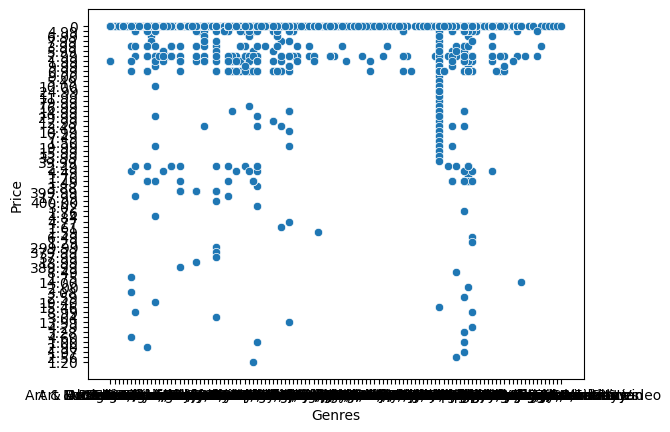

In [34]:
sns.scatterplot(x=data['Genres'], y=data['Price'])


Last Updated Column

In [35]:
data['Last Updated'].unique() 

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [36]:
data['Last Updated'].nunique() 


1278

Current Ver Column

In [37]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

Android Ver

In [38]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '1.5 and up', '7.0 and up', '4.3 and up', '4.0.3 - 7.1.1',
       '2.0 and up', '2.3.3 and up', 'Varies with device', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

### Fix Data Type 

In [39]:
numeric_columns = ['Reviews', 'Size', 'Installs', 'Price', 'Current Ver', 'Android Ver']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [40]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size               256
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       4714
Android Ver       7418
dtype: int64

In [41]:
data.dropna(subset=['Size'], inplace=True)

## Explore Numeric Data

In [42]:
numeric = [col for col in data.columns if np.issubdtype(data[col].dtype, np.number)]
numeric

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Current Ver',
 'Android Ver']

### Handling Numeric Data

Rating Column

In [43]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 5. , 2.6, 3.1, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Reviews Column

In [44]:
data['Reviews'].unique()


array([   159,    967,  87510, ...,    885,    603, 398307])

## Feature Engineer

In [45]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Year'] = data['Last Updated'].dt.year
data['Month'] = data['Last Updated'].dt.month
data['Day'] = data['Last Updated'].dt.day

## Explore Outliers

<Axes: ylabel='Last Updated'>

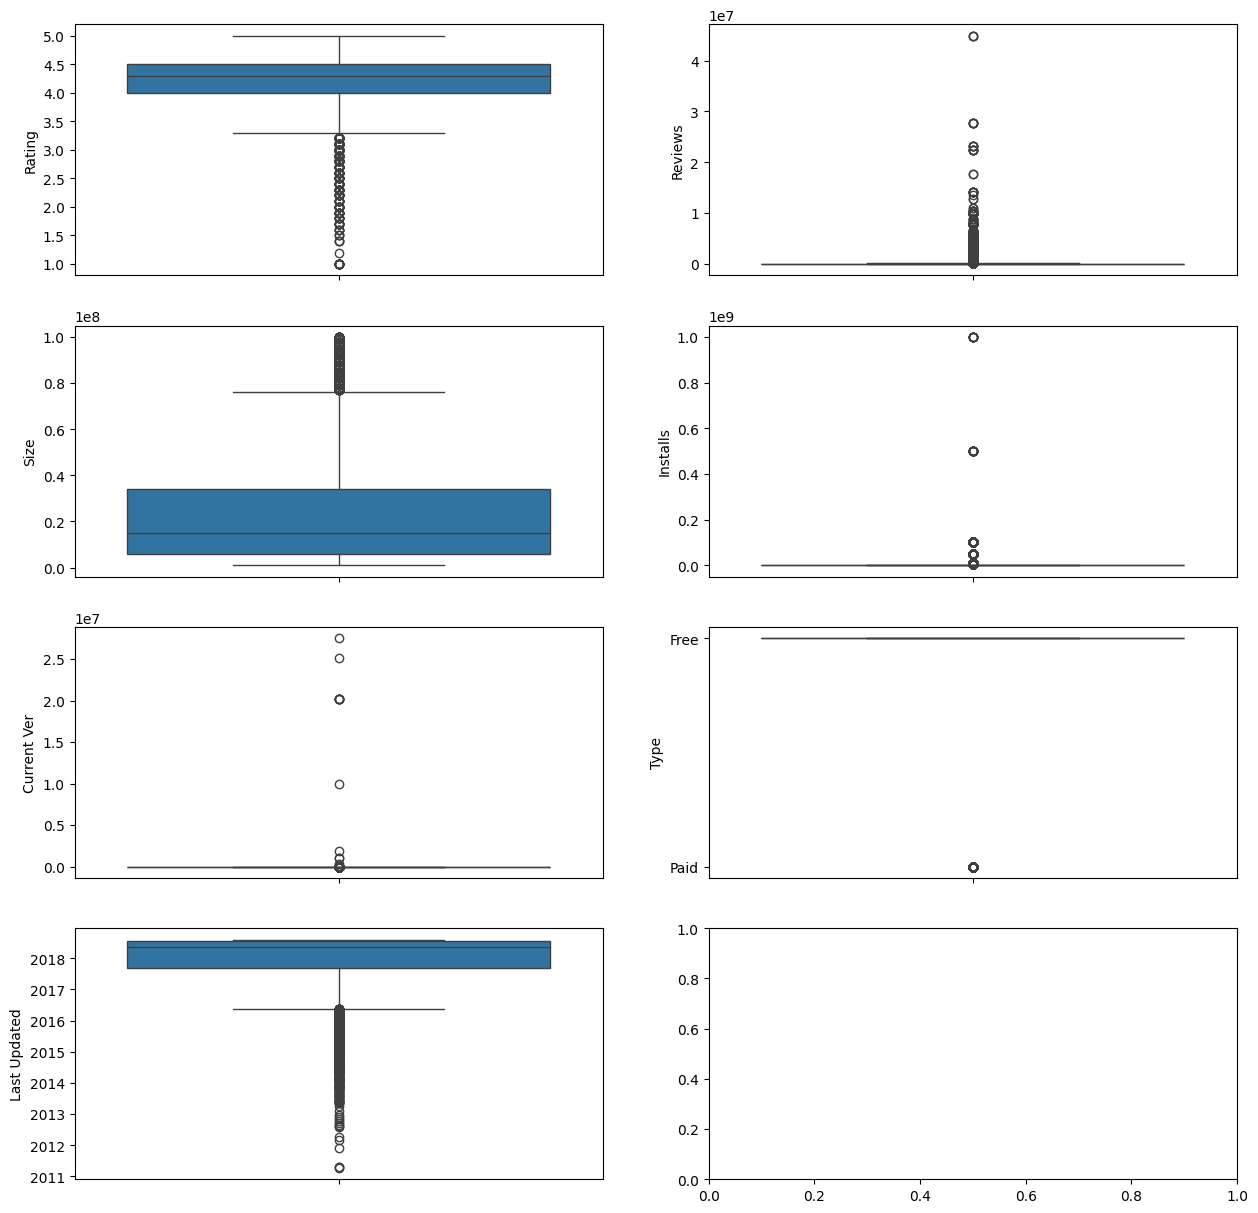

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data["Rating"], ax = axes[0][0])
sns.boxplot(data["Reviews"], ax = axes[0][1])
sns.boxplot(data["Size"], ax = axes[1][0])
sns.boxplot(data["Installs"], ax = axes[1][1])
sns.boxplot(data["Current Ver"], ax = axes[2][0])
sns.boxplot(data["Type"], ax = axes[2][1])
sns.boxplot(data["Last Updated"], ax = axes[3][0])
# sns.boxplot(data["EstimatedSalary"], ax = axes[3][1])

## Handling Outliers

In [47]:
# outlier_columns = ['Rating', 'Installs', 'Size', 'Reviews', 'Current Ver', 'Last Updated']

# outliers_indices = detect_outliers(data, 0, outlier_columns)
# for col in outlier_columns:
#     median_value = data[col].median()
#     data.loc[outliers_indices, col] = median_value
    


In [48]:
def detect_IQR(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return IQR, lower_bound, upper_bound


In [49]:
def handling_outliers_median(column):
    lower_bound = detect_IQR(column)[1]
    upper_bound = detect_IQR(column)[2]
    medain_value = data[column].median()
    data[column] = data[column].apply(lambda value : medain_value if (value < lower_bound) or (value > upper_bound) else value)

In [50]:
def handling_outliers_mean(column):
    lower_bound = detect_IQR(column)[1]
    upper_bound = detect_IQR(column)[2]
    mean_value = data[column].mean()
    data[column] = data[column].apply(lambda value : mean_value if (value < lower_bound) or (value > upper_bound) else value)

In [51]:
handling_outliers_median('Rating')
handling_outliers_median('Reviews')
handling_outliers_median('Size')
handling_outliers_median('Installs')
handling_outliers_median('Current Ver')
# handling_outliers_median('Type')
handling_outliers_median('Last Updated')




<Axes: ylabel='Last Updated'>

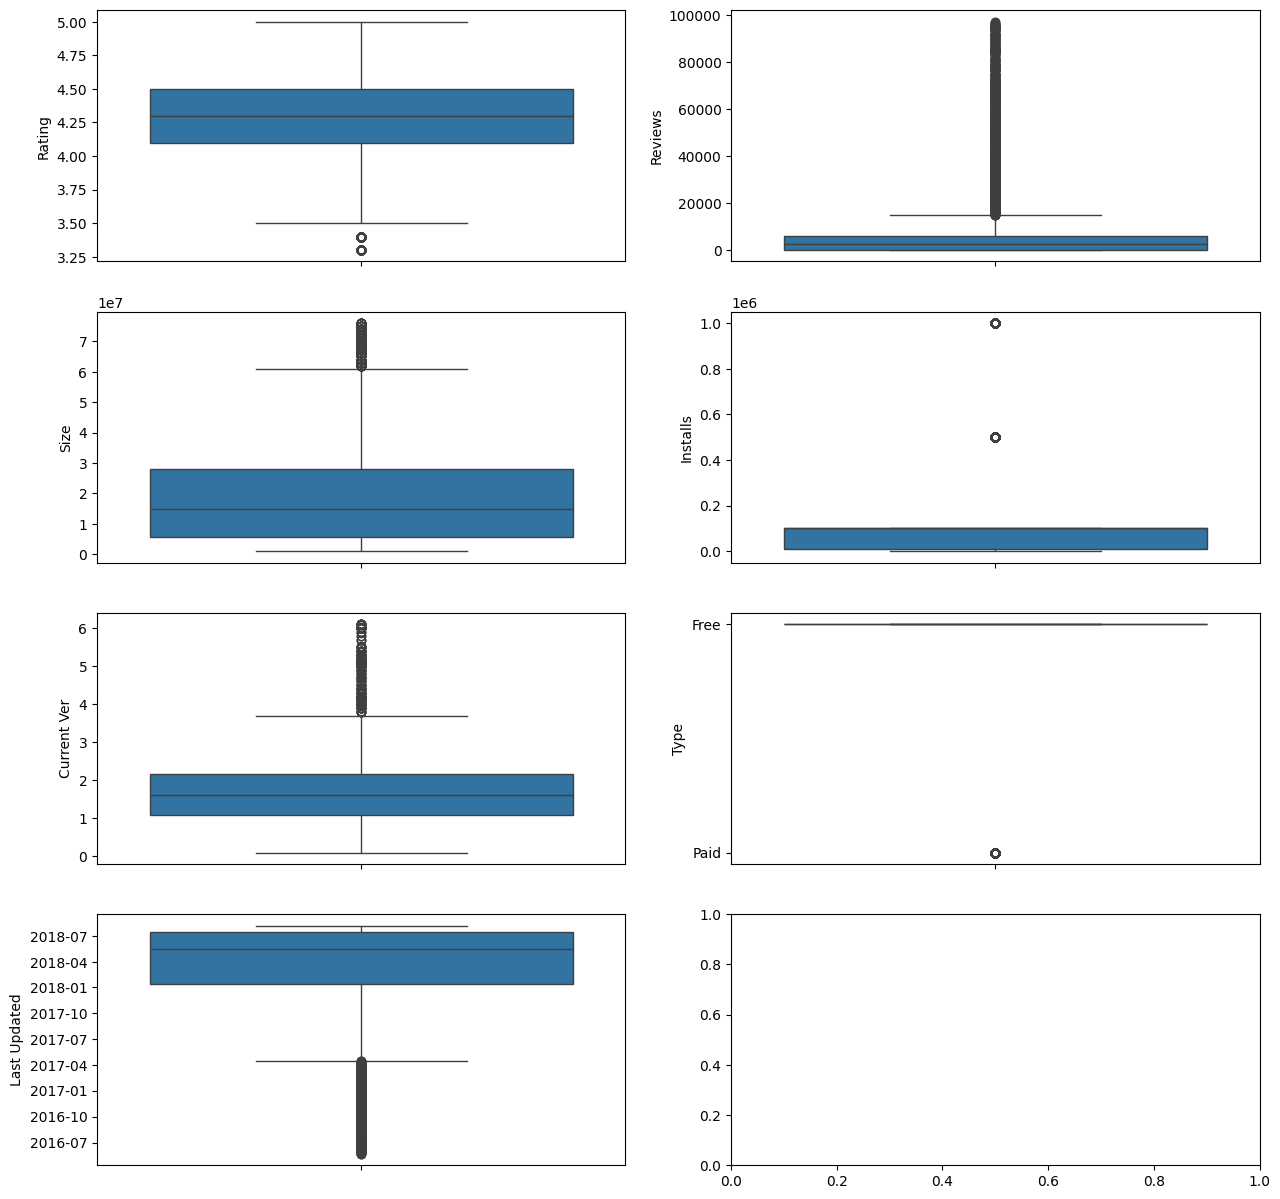

In [52]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data["Rating"], ax = axes[0][0])
sns.boxplot(data["Reviews"], ax = axes[0][1])
sns.boxplot(data["Size"], ax = axes[1][0])
sns.boxplot(data["Installs"], ax = axes[1][1])
sns.boxplot(data["Current Ver"], ax = axes[2][0])
sns.boxplot(data["Type"], ax = axes[2][1])
sns.boxplot(data["Last Updated"], ax = axes[3][0])
# sns.boxplot(data["EstimatedSalary"], ax = axes[3][1])

## Feature Selection

In [53]:
drob_columns = ['Current Ver', 'Android Ver', 'Last Updated', 'Category', 'Genres', 'App']
data.drop(drob_columns, axis=1, inplace=True)


## Encoding

In [54]:
# encoder_columns = ['App']
# data = pd.get_dummies(data, columns=encoder_columns, dtype=int)

In [55]:
encoder_type = {
    'Free': 0,
    'Paid':1
}

data['Type'] = data['Type'].map(encoder_type)

In [56]:
encoder_rating = {
    'Everyone': 0,
    'Unrated': 0,
    'Teen': 1,
    'Everyone 10+': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4
}

data['Content Rating'] = data['Content Rating'].map(encoder_rating)

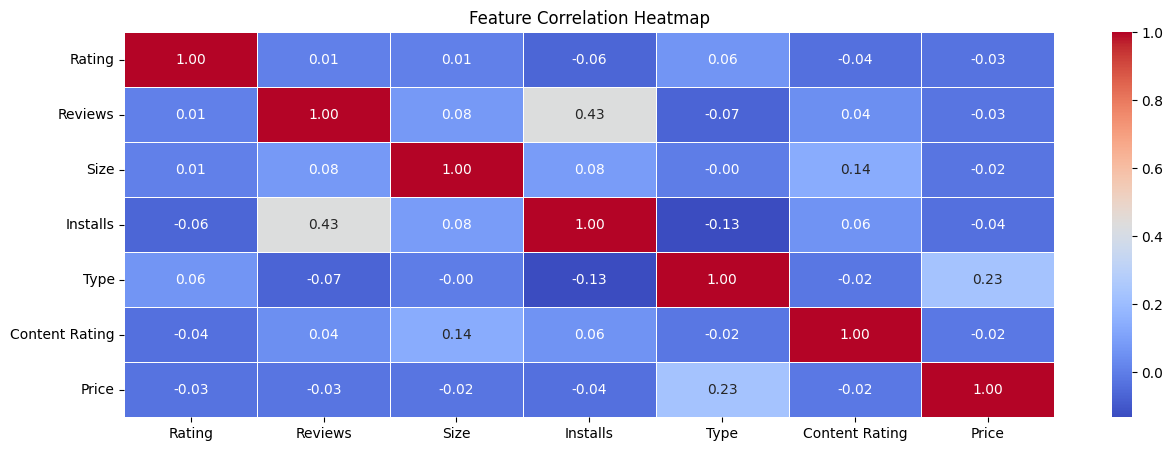

In [57]:
columns = ['Rating','Reviews', 'Size', 'Installs', 'Type', 'Content Rating', 'Price']
corr_matrix = data[columns].corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting data into training and testing sets

In [58]:
input = data.drop(columns=['Price'])
output = data['Price']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

## Robust Scaler

In [60]:
scaler_columns = ['Rating', 'Reviews', 'Installs', 'Size', 'Content Rating']

In [61]:
scaler = RobustScaler()
x_train[scaler_columns] = scaler.fit_transform(x_train[scaler_columns])
x_test[scaler_columns] = scaler.transform(x_test[scaler_columns])


In [62]:
data.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Year', 'Month', 'Day'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          7162 non-null   float64
 1   Reviews         7162 non-null   float64
 2   Size            7162 non-null   float64
 3   Installs        7162 non-null   float64
 4   Type            7162 non-null   int64  
 5   Price           7162 non-null   float64
 6   Content Rating  7162 non-null   int64  
 7   Year            7162 non-null   int32  
 8   Month           7162 non-null   int32  
 9   Day             7162 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 531.6 KB


## Model

In [64]:
model = LinearRegression()

In [65]:
model.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)


In [67]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

MAE: 2.7458769839176917
MSE: 478.62186381908725
R² Score: 0.06129441464383534
